## <strong>Step: Reading Data from diabetes.csv file to Diabetes_dataset DataFrame</strong>

In [1]:
import pandas as pd
Diabetes_dataset = pd.read_csv('diabetes.csv', sep=',')
# to print the first five rows
print(Diabetes_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# to get the information about the data
print(Diabetes_dataset.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
# to check if the data is balance or unbalanced
print(Diabetes_dataset.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


## Data Visulaization

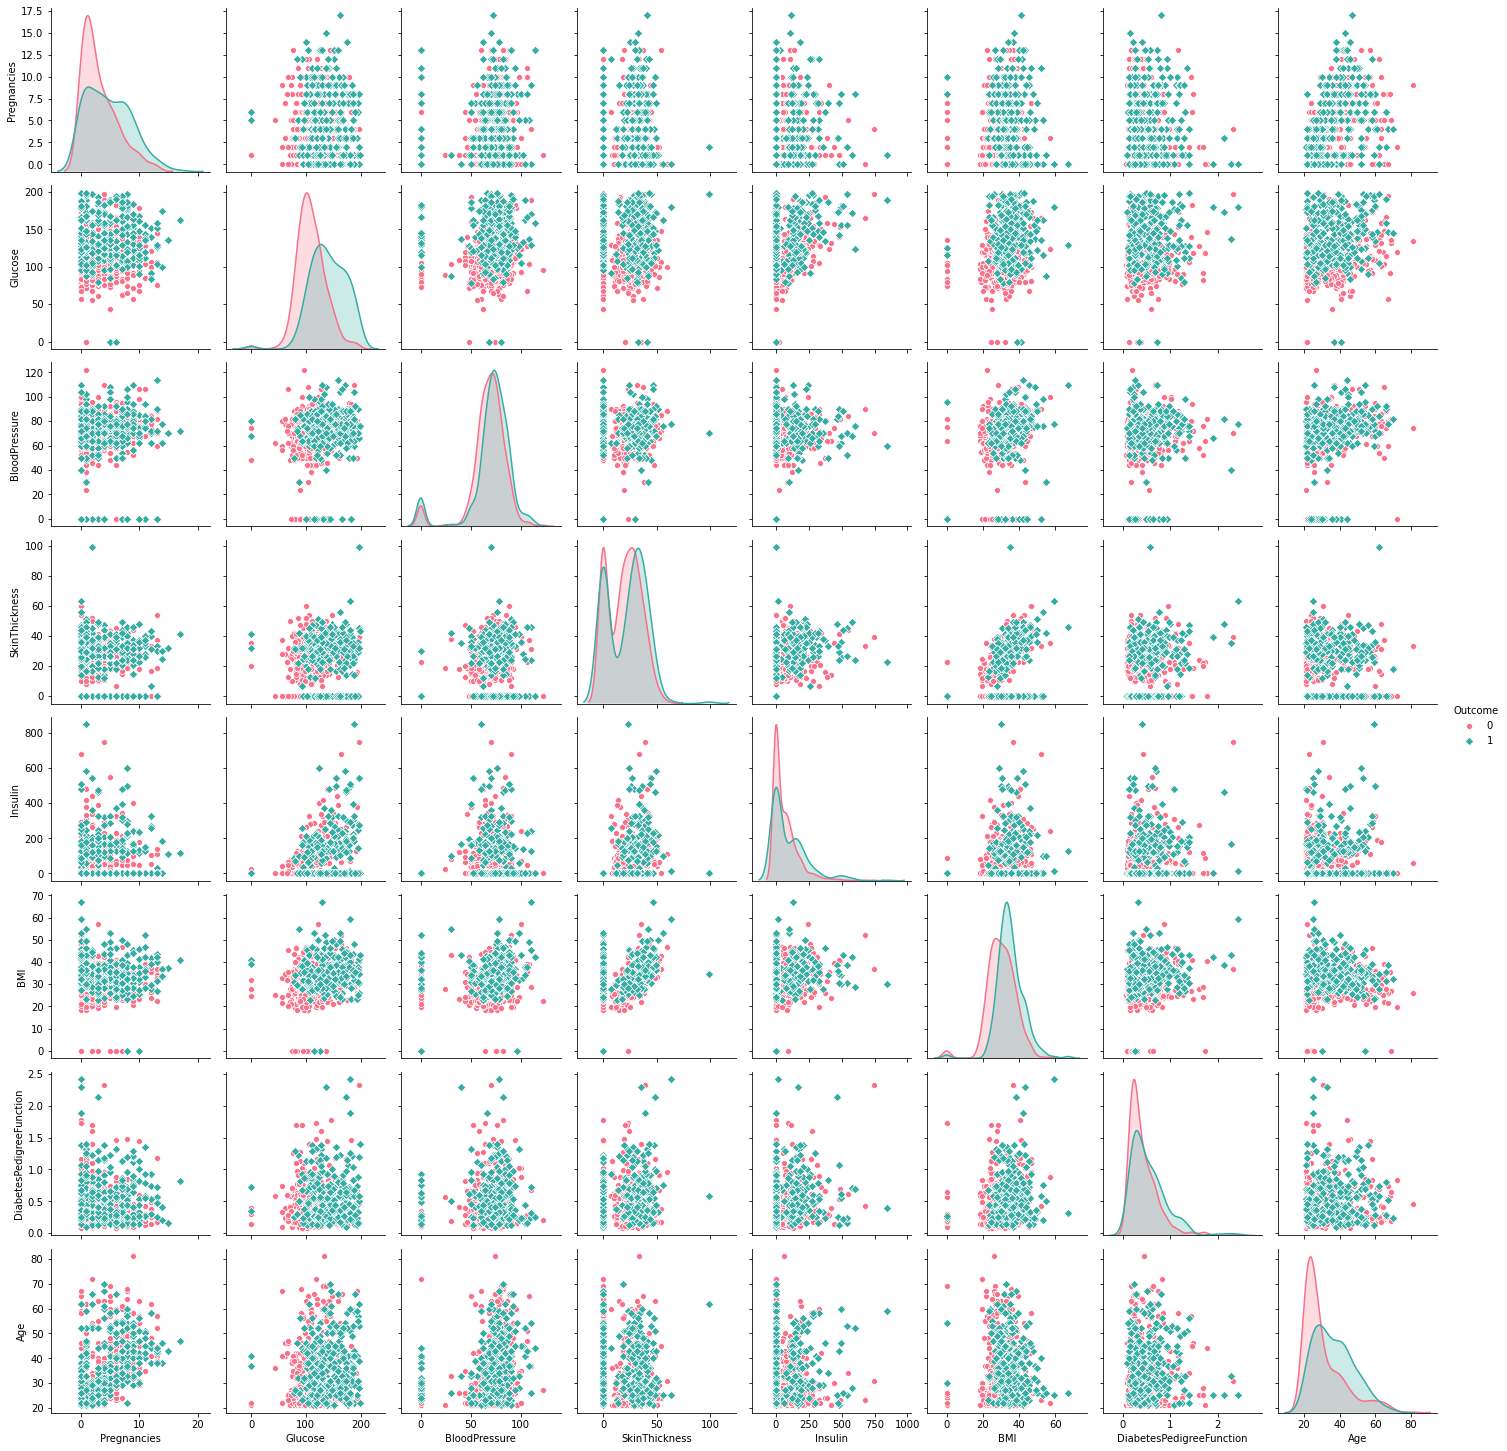

In [4]:
import matplotlib as plt
import seaborn as sns
sns.pairplot(Diabetes_dataset, hue='Outcome', palette="husl", markers=["o","D"])
plt.pyplot.show()

## <strong>Step: Display Correlation Heatmap</strong>

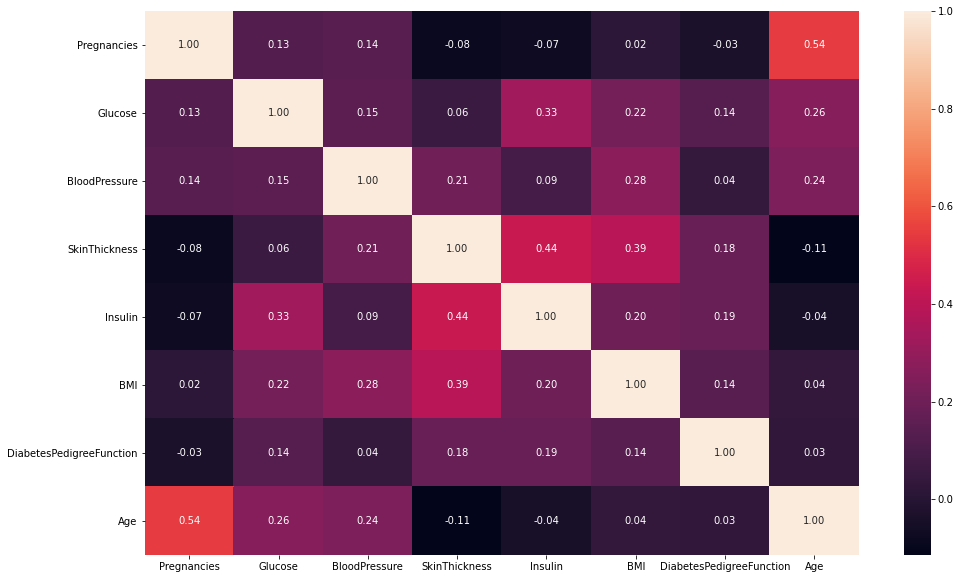

In [5]:
df = Diabetes_dataset.loc[:, :'Age']
corrMatrix = df.corr()
plt.pyplot.figure(figsize=(16,10))
sns.heatmap(corrMatrix, cbar=True,annot=True,fmt='.2f')
plt.pyplot.savefig('Correlation Heatmap.png')
plt.pyplot.show()

## <strong>Step : Splitting Data for training and testing.
#### Training set : 70% and Testing set : 30% </strong>

In [6]:
from sklearn.model_selection import train_test_split
X = Diabetes_dataset.loc[:,:'Age']
y = Diabetes_dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3 )

## Step: Importing Basic Libraries

In [7]:
# importing the libraries
from sklearn.metrics import accuracy_score
import numpy as np


## Step: Running different models

In [8]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB 

# Step 1: Create the model
Naive_model = GaussianNB()
# Step 2: Fit the training data into the model
Naive_model.fit(X_train, y_train)
# Step 3: Predict the result
Naive_y_test_hat = Naive_model.predict(X_test)
# Step 4: Calculate the different metrics 
Naive_Accuracy = accuracy_score(y_test,Naive_y_test_hat, normalize = True) * 100 
print("\tAccuracy of Naive Bayes:",Naive_Accuracy)

	Accuracy of Naive Bayes: 76.19047619047619


In [9]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Create the model
KNN_model = KNeighborsClassifier(n_neighbors= 14)
# Step 2: Fit the training data into the model
KNN_model.fit(X_train, y_train)
# Step 3: Predict the result
KNN_y_test_hat = KNN_model.predict(X_test)
# Step 4: Calculate the different metrics 
KNN_Accuracy = accuracy_score(y_test,KNN_y_test_hat, normalize = True) * 100 
print("\tAccuracy of KNeighbors Classifier:",KNN_Accuracy)

	Accuracy of KNeighbors Classifier: 74.89177489177489


In [10]:
# Support vector classifier
from sklearn.svm import SVC 

# Step 1: Create the model
SVC_model = SVC(kernel='linear', C=1, gamma="auto",probability=True) 
# Step 2: Fit the training data into the model
SVC_model.fit(X_train, y_train)
# Step 3: Predict the result
SVC_y_test_hat = SVC_model.predict(X_test)
# Step 4: Calculate the different metrics 
SVC_Accuracy = accuracy_score(y_test,SVC_y_test_hat, normalize = True) * 100 
print("\tAccuracy of Support Vector Classifier:",SVC_Accuracy)

	Accuracy of Support Vector Classifier: 78.35497835497836


In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Step 1: Create the model
DTC_model = DecisionTreeClassifier(max_depth = 2)
# Step 2: Fit the training data into the model
DTC_model.fit(X_train, y_train)
# Step 3: Predict the result
DTC_y_test_hat = DTC_model.predict(X_test)
# Step 4: Calculate the different metrics 
DTC_Accuracy = accuracy_score(y_test,DTC_y_test_hat, normalize = True) * 100 
print("\tAccuracy of Decision Tree Classifier:",DTC_Accuracy)

	Accuracy of Decision Tree Classifier: 72.72727272727273


In [12]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Step 1: Create the model
RFC_model = RandomForestClassifier(criterion= 'gini', max_depth= 6, n_estimators= 100, random_state=0)
# Step 2: Fit the training data into the model
RFC_model.fit(X_train,y_train)
# Step 3: Predict the result
RFC_y_test_hat  = RFC_model.predict(X_test)
# Step 4: Calculate the different metrics 
RFC_Accuracy = accuracy_score(y_test,RFC_y_test_hat, normalize = True) * 100 
print("\tAccuracy of Random Forest Classifier:",RFC_Accuracy)

	Accuracy of Random Forest Classifier: 76.62337662337663


## <strong>Step: Different parameters for comparisions. </strong>

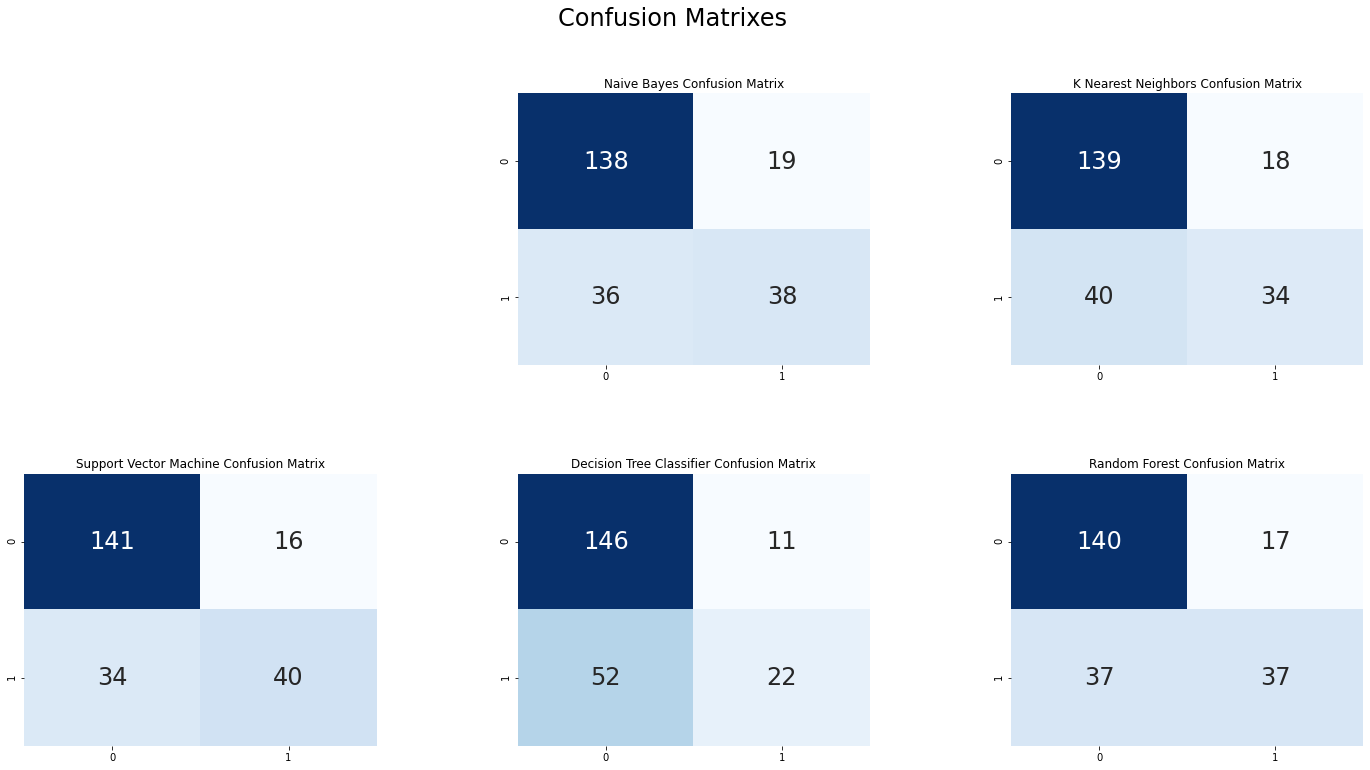

In [14]:
from sklearn.metrics import confusion_matrix
plt.pyplot.figure(figsize=(24,12))

plt.pyplot.suptitle("Confusion Matrixes",fontsize=24)
plt.pyplot.subplots_adjust(wspace = 0.4, hspace= 0.4)

# plt.pyplot.subplot(2,3,1)
# plt.pyplot.title("Logistic Regression Confusion Matrix")
# sns.heatmap(confusion_matrix(y_test,LR_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,2)
plt.pyplot.title("Naive Bayes Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,Naive_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,3)
plt.pyplot.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,KNN_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,4)
plt.pyplot.title("Support Vector Machine Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,SVC_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,5)
plt.pyplot.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,DTC_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,6)
plt.pyplot.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,RFC_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.savefig('Confusion Matirx.png')
plt.pyplot.show()

In [15]:
from sklearn.metrics import classification_report

print("\nNaive Bayes:")
print("\tClassification_report")
print(classification_report(y_test,Naive_y_test_hat))


print("\nKNeighbors Classifier:")
print("\tClassification_report:")
print(classification_report(y_test,KNN_y_test_hat))


print("\nSupport Vector Classifier:")
print("\tClassification_report:")
print(classification_report(y_test,SVC_y_test_hat))


print("\nDecision Tree Classifier:")
print("\tClassification_report:")
print(classification_report(y_test,DTC_y_test_hat))


print("\nRandom Forest Classifier: ")
print("\tClassification_report:")
print(classification_report(y_test,RFC_y_test_hat))



Naive Bayes:
	Classification_report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231


KNeighbors Classifier:
	Classification_report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.65      0.46      0.54        74

    accuracy                           0.75       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231


Support Vector Classifier:
	Classification_report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78  